In [ ]:
# @Author : Wang Yilin 王依林
# @Time : 5/12/2024
# @Github : https://github.com/hiki-wang/MSDM5051_P2.git

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union,List
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 200)

In [58]:
# 这门课是python又不是C++,都有pandas了还让做表格的管理系统，多少沾点__

In [59]:
# 该类仅保存单一文件（小时）中的数据
class Traffic_Data:
    def __init__(self, df):
        self.columns_list = ['VehicleType','DerectionTime_O','GantryID_O','DerectionTime_D','GantryID_D','TripLength','TripEnd','TripInformation']
        df.dropna(how='all',axis=0, inplace=True)
        df.columns = self.columns_list
        df['DerectionTime_O'] = pd.to_datetime(df['DerectionTime_O'])
        df['DerectionTime_D'] = pd.to_datetime(df['DerectionTime_D'])
        self.df = df

    # 由于没要求删数据，因此我只重载了加法运算符
    def __add__(self, other):
        if isinstance(other, Traffic_Data):
            new_df = pd.concat([self.df, other.df], ignore_index=True)
            return Traffic_Data(new_df)
        elif isinstance(other, pd.DataFrame):
            new_df = pd.concat([self.df, other], ignore_index=True)
            return Traffic_Data(new_df)
        else:
            raise TypeError('Operand must be an instance of Traffic_Data')

    def search(self,start_time:str='00:00:00', end_time:str='12:00:00', vehicle_type:int=31, default_date:str = '2023-12-04'):
        """
        不需要设计多日搜索，因为数据都在同一天
        :param start_time: 搜索开始时间
        :param end_time: 搜索结束时间
        :param vehicle_type: 车辆类型
        :return: 所需数据的Traffic_Data对象
        """
        # 若只输入了时刻

        if(len(start_time)==8):
            start_time = f"{default_date} {start_time}"
        if(len(end_time)==8):
            end_time = f"{default_date} {end_time}"
        # 转为datetime
        start_time = pd.to_datetime(start_time)
        end_time = pd.to_datetime(end_time)
        # 筛选
        filter = self.df[(self.df['DerectionTime_O'] >= start_time) & (self.df['DerectionTime_D'] <= end_time) & (
                self.df['VehicleType'] == vehicle_type)].copy()
        return Traffic_Data(filter)

    # 为什么需要返回值？因为我们大概率之后还要写前端，而不是直接在notebook或console上看结果。
    def display(self, n_row:int=10, display_all = False, random=False):
        if display_all:
            print('too large, please wait...')
            display(self.df)
            return self
        else:
            if random==True:
                sample_df = self.df.sample(n=n_row).copy()
                display(sample_df)
                return Traffic_Data(sample_df)
            else:
                sample_df = self.df.iloc[:n_row].copy()
                display(sample_df)
                return Traffic_Data(sample_df)

    # 排序函数，输入列名和列位置均可
    # 至于具体的sort算法，我的评价是自己怎么写都不如内置的快，干脆不写
    def sort(self, sort_by: Union[int, str]='DerectionTime_O',ascending=True):
        if isinstance(sort_by, int):
            sort_by = self.columns_list[sort_by]
        sorted_df = self.df.sort_values(sort_by, ascending=ascending)
        return Traffic_Data(sorted_df)

    # 这里就不做filter了, 因为前面有search。想只export部分的可以search。
    def export(self,type:str='csv'):
        if type=='csv':
            pd.DataFrame.to_csv(self.df,index=False)
        elif type=='excel':
            pd.DataFrame.to_excel(self.df,index=False)
        elif type=='pickle':
            pd.DataFrame.to_pickle(self.df,index=False)
        return

    # 下面可以加一些其他函数，例如数据的各种描述性统计，如：每分钟车辆个数的频率分布直方图、不同type车辆的直方图、TripLength的五数概括、平均值等等
    # 这里只给出一个,之后需要看情况添加/修改（例如增加返回值、保存图片到本地等），因为我们要写前端
    def plot_minute_counts(self):
        df = self.df.copy()
        df['Minute'] = df['DerectionTime_O'].dt.minute
        minute_counts = df['Minute'].value_counts().sort_index()
        plt.figure(figsize=(12, 6))
        plt.bar(minute_counts.index, minute_counts.values, color='skyblue')
        plt.title('Number of VehicleTypes per Minute')
        plt.xlabel('Minute')
        plt.ylabel('Number of VehicleTypes')
        plt.xticks(range(60))
        plt.grid(axis='y')
        plt.show()
        return

In [60]:
df = pd.read_csv('./TDCS_M06A_20231204/23120406.csv')
test = Traffic_Data(df)

In [61]:
test.display()

,VehicleType,DerectionTime_O,GantryID_O,DerectionTime_D,GantryID_D,TripLength,TripEnd,TripInformation
0,31,2023-12-04 06:33:43,03F2100N,2023-12-04 06:41:14,03F1941N,19.70,Y,2023-12-04 06:33:43+03F2100N; 2023-12-04 06:34...
1,31,2023-12-04 06:31:05,01F3640N,2023-12-04 06:31:05,01F3640N,5.00,Y,2023-12-04 06:31:05+01F3640N
2,31,2023-12-04 06:53:18,01F3736N,2023-12-04 07:26:23,01F3286N,47.00,Y,2023-12-04 06:53:18+01F3736N; 2023-12-04 06:55...
3,32,2023-12-04 06:46:08,03F0498N,2023-12-04 06:51:06,03F0447N,7.60,Y,2023-12-04 06:46:08+03F0498N; 2023-12-04 06:51...
4,31,2023-12-04 06:29:13,03F0394S,2023-12-04 07:13:22,03F1128S,79.10,Y,2023-12-04 06:29:13+03F0394S; 2023-12-04 06:32...
5,31,2023-12-04 06:34:01,03F2153N,2023-12-04 06:38:30,03F2066N,15.10,Y,2023-12-04 06:34:01+03F2153N; 2023-12-04 06:35...
6,31,2023-12-04 06:21:45,01F3460N,2023-12-04 06:46:29,01F3019N,49.83,Y,2023-12-04 06:21:45+01F3460N; 2023-12-04 06:25...
7,31,2023-12-04 06:20:25,01F3019N,2023-12-04 06:20:25,01F3019N,4.13,Y,2023-12-04 06:20:25+01F3019N
8,31,2023-12-04 06:57:24,01F2425N,2023-12-04 06:57:24,01F2425N,3.20,Y,2023-12-04 06:57:24+01F2425N
9,31,2023-12-04 06:57:23,01F1699S,2023-12-04 07:02:12,01F1774S,10.50,Y,2023-12-04 06:57:23+01F1699S; 2023-12-04 07:02...


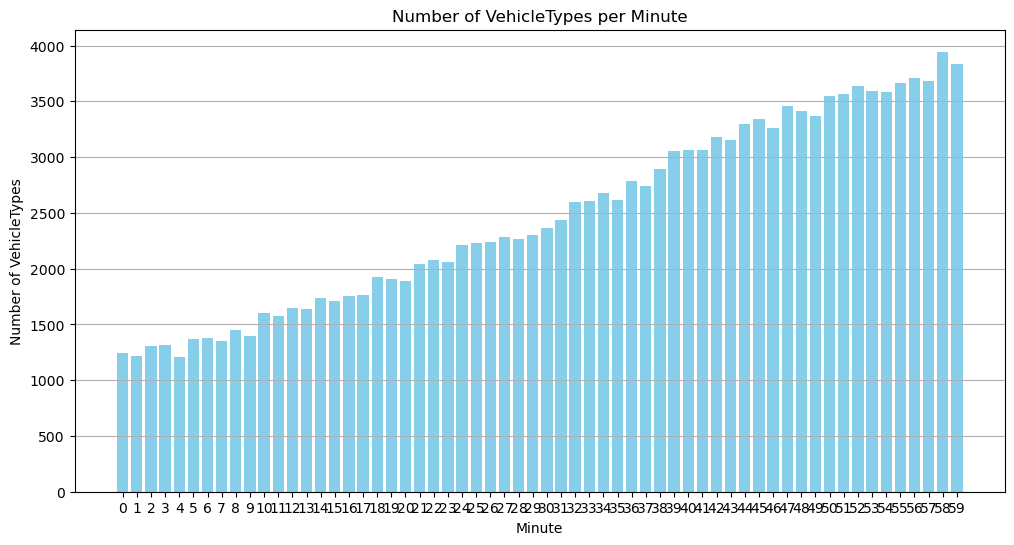

In [62]:
test.plot_minute_counts()

In [63]:
test.sort().display()

,VehicleType,DerectionTime_O,GantryID_O,DerectionTime_D,GantryID_D,TripLength,TripEnd,TripInformation
38288,5,2023-12-04 06:00:00,03F4232N,2023-12-04 06:05:00,03F4168N,9.3,Y,2023-12-04 06:00:00+03F4232N; 2023-12-04 06:05...
145981,32,2023-12-04 06:00:00,01F2011S,2023-12-04 07:10:50,01F3083S,112.7,Y,2023-12-04 06:00:00+01F2011S; 2023-12-04 06:05...
100567,31,2023-12-04 06:00:00,01F3696N,2023-12-04 06:10:29,01F3525N,21.0,Y,2023-12-04 06:00:00+01F3696N; 2023-12-04 06:01...
121722,31,2023-12-04 06:00:00,01F0511N,2023-12-04 06:00:00,01F0511N,3.4,Y,2023-12-04 06:00:00+01F0511N
38660,31,2023-12-04 06:00:00,03F4232N,2023-12-04 08:16:47,03F1779N,248.4,Y,2023-12-04 06:00:00+03F4232N; 2023-12-04 06:03...
21262,31,2023-12-04 06:00:00,01F0467N,2023-12-04 06:08:46,01F0340N,16.0,Y,2023-12-04 06:00:00+01F0467N; 2023-12-04 06:04...
145623,31,2023-12-04 06:00:00,03F3588S,2023-12-04 06:19:33,03F3916S,34.6,Y,2023-12-04 06:00:00+03F3588S; 2023-12-04 06:05...
36569,31,2023-12-04 06:00:00,03F0158S,2023-12-04 06:36:04,05F0494S,55.5,Y,2023-12-04 06:00:00+03F0158S; 2023-12-04 06:00...
97942,31,2023-12-04 06:00:00,01F3696N,2023-12-04 06:27:48,01F3185N,54.9,Y,2023-12-04 06:00:00+01F3696N; 2023-12-04 06:01...
95997,31,2023-12-04 06:00:00,01F3696N,2023-12-04 06:31:06,01F3126N,59.3,Y,2023-12-04 06:00:00+01F3696N; 2023-12-04 06:01...


In [64]:
# 用于管理data的类，读取数据文件、合并数据等
class Traffic_Data_hours:
    # 用路径名、路径列表、Traffic_Data初始化均可。暂不考虑用Dataframe初始化，没什么意义。
    def __init__(self, init_input: Union[List, str, Traffic_Data]):
        if isinstance(init_input, Traffic_Data):
            self.Data=init_input
        else:
            if isinstance(init_input, str):
                init_input = [init_input]
            df = pd.read_csv(init_input[0], header=None)
            Data = Traffic_Data(df)
            for path in init_input[1:]:
                Data_temp = pd.read_csv(path,header=None)
                Data = Data+Traffic_Data(Data_temp)
            self.Data = Data
    def append(self, other):
        if isinstance(other, Traffic_Data_hours):
            self.Data = self.Data + other.Data
        elif isinstance(other, (Traffic_Data,pd.DataFrame)):
            self.Data = self.Data + other
        else:
            raise TypeError('Operand must be an instance of Traffic_Data_hours/Traffic_Data/DataFrame')
    def search(self,start_time:str='00:00:00', end_time:str='12:00:00', vehicle_type:int=31, default_date:str = '2023-12-04'):
        return Traffic_Data_hours(self.Data.search(start_time=start_time, end_time=end_time, vehicle_type=vehicle_type, default_date=default_date))
    def display(self, n_row:int=10, display_all=False):
        return Traffic_Data_hours(self.Data.display(n_row=n_row, display_all=display_all))
    def sort(self, sort_by: Union[int, str]='DerectionTime_O',ascending=True):
        return Traffic_Data_hours(self.Data.sort(sort_by=sort_by, ascending=ascending))
    def export(self,type:str='csv'):
        Traffic_Data_hours(self.Data.export(type=type))
        return
    def plot_hourly_counts(self):
        df = self.Data.df.copy()
        df['DerectionTime_O'] = pd.to_datetime(df['DerectionTime_O'])
        df['Hour'] = df['DerectionTime_O'].dt.hour
        hourly_counts = df['Hour'].value_counts().sort_index()
        plt.figure(figsize=(12, 6))
        plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
        plt.title('Number of VehicleTypes per Hour')
        plt.xlabel('Hour')
        plt.ylabel('Number of VehicleTypes')
        plt.xticks(range(24))
        plt.grid(axis='y')
        plt.show()

In [66]:
path_list = ['C:\\Users\\18390\\Desktop\\ddm5051\\project2\\TDCS_M06A_20231204\\23120406.csv','C:\\Users\\18390\\Desktop\\ddm5051\\project2\\TDCS_M06A_20231204\\23120407.csv']
test1 = Traffic_Data_hours(init_input=path_list)

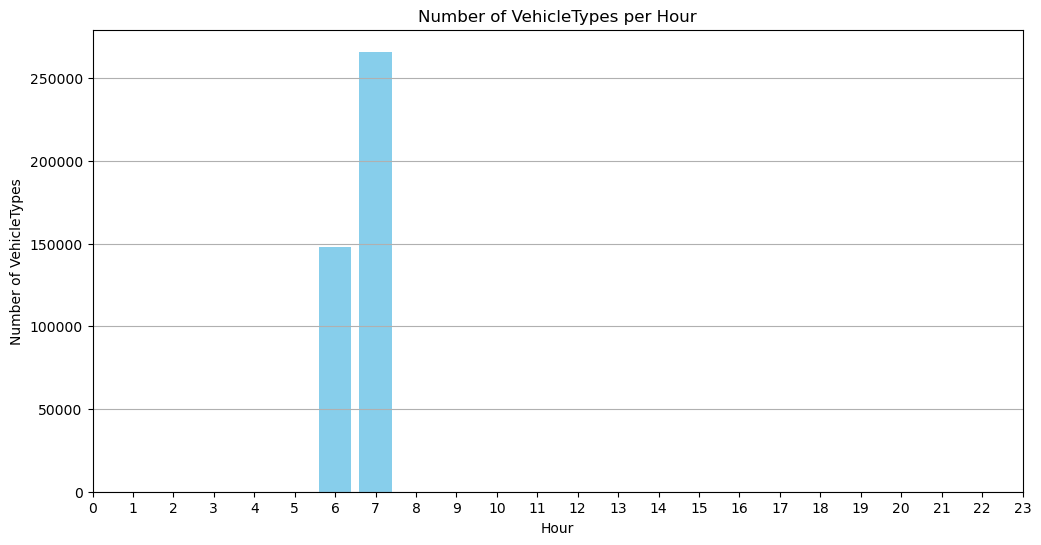

In [71]:
test1.plot_hourly_counts()

In [72]:
test1.sort().display()

,VehicleType,DerectionTime_O,GantryID_O,DerectionTime_D,GantryID_D,TripLength,TripEnd,TripInformation
3367,31,2023-12-04 06:00:00,01F0511N,2023-12-04 06:19:30,01H0208N,31.8,Y,2023-12-04 06:00:00+01F0511N; 2023-12-04 06:01...
117665,42,2023-12-04 06:00:00,01F2089N,2023-12-04 06:54:46,01F1389N,78.2,Y,2023-12-04 06:00:00+01F2089N; 2023-12-04 06:06...
38661,31,2023-12-04 06:00:00,03F4232N,2023-12-04 08:16:47,03F1779N,248.4,Y,2023-12-04 06:00:00+03F4232N; 2023-12-04 06:03...
145982,32,2023-12-04 06:00:00,01F2011S,2023-12-04 07:10:50,01F3083S,112.7,Y,2023-12-04 06:00:00+01F2011S; 2023-12-04 06:05...
95998,31,2023-12-04 06:00:00,01F3696N,2023-12-04 06:31:06,01F3126N,59.3,Y,2023-12-04 06:00:00+01F3696N; 2023-12-04 06:01...
50821,42,2023-12-04 06:00:00,01F2249S,2023-12-04 07:24:22,03F3916S,148.2,Y,2023-12-04 06:00:00+01F2249S; 2023-12-04 06:04...
67256,31,2023-12-04 06:00:00,03A0015S,2023-12-04 06:00:00,03A0015S,3.6,Y,2023-12-04 06:00:00+03A0015S
121723,31,2023-12-04 06:00:00,01F0511N,2023-12-04 06:00:00,01F0511N,3.4,Y,2023-12-04 06:00:00+01F0511N
50704,31,2023-12-04 06:00:00,01F0061S,2023-12-04 06:00:00,01F0061S,1.8,Y,2023-12-04 06:00:00+01F0061S
28276,31,2023-12-04 06:00:00,01F0681N,2023-12-04 06:07:11,01F0584N,12.2,Y,2023-12-04 06:00:00+01F0681N; 2023-12-04 06:01...


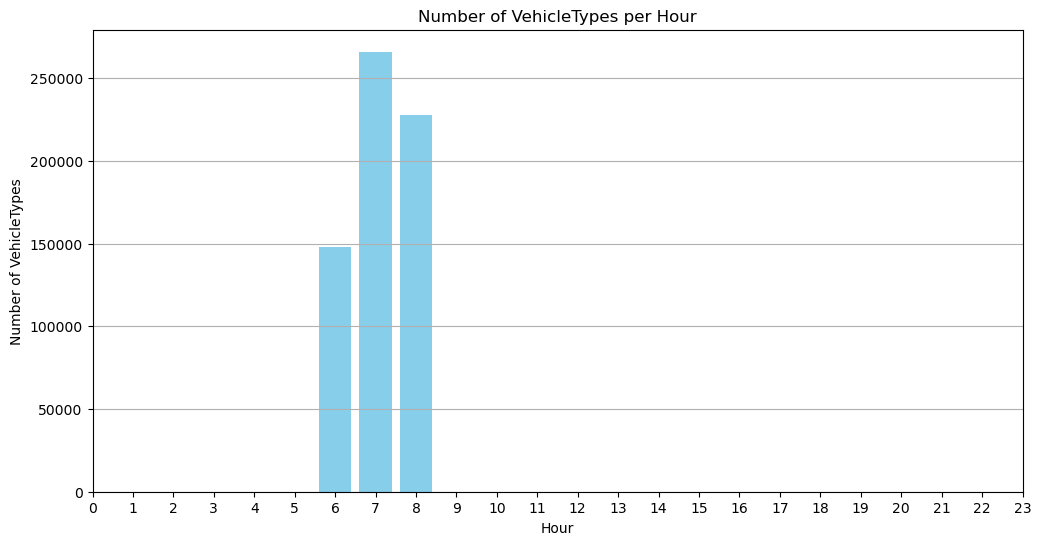

In [73]:
test2 = Traffic_Data_hours(init_input='C:\\Users\\18390\\Desktop\\ddm5051\\project2\\TDCS_M06A_20231204\\23120408.csv')
test1.append(test2)
test1.plot_hourly_counts()

In [ ]:
# 初步测试无误（可能需要你们进一步测试这些函数）
# 接下来只需要把这两个class放在两个.py文件里面即可
# 然后开始就可以开始写前端了
# 建议前端和报告同时写